# GoodPlot: Dose-Response Edition
This is a template for making clear and informative plots for internal communications. 
This edition is for dose-response / concentration / categorical series plots.
It uses **matplotlib** for plotting. There are some other packages like **seaborn** that facililate making good plots in python.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## create some toy data [replace with your data here]

In [2]:
# create data as a nested list. This is just one bare bones way to structure your data.
data = []

data_conc = [0.003, 0.03, 0.3, 3, 12, 30, 100] #or dose / your independent experimental variable, i.e. x-axis
num_groups = len(data_conc)

max_pointspergroup = 15
for i in range(num_groups):
    num_datapoints = np.random.randint(max_pointspergroup) + 1
    data.append(np.random.randn(num_datapoints) + np.sin(i) + 1)
    
# if you have a separate control group, define it here, otherwise comment out
data_control = 0.3*np.random.randn(10)

## set up publication-style axes

In [3]:
# this gets rid of upper and right axis box lines and sets ticks outward
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

## make a good plot

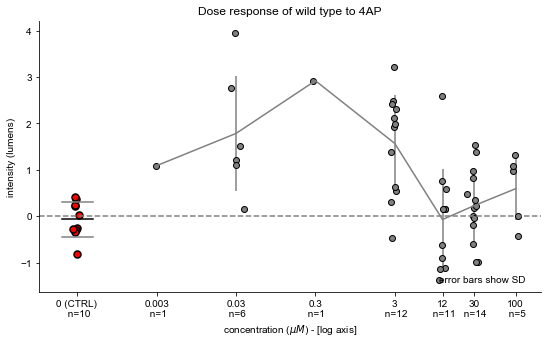

In [5]:
f=plt.figure(1,figsize=(9, 5), facecolor='white')  
plt.rc('font',**{'family':'sans-serif','sans-serif':['Arial']}) #just a pet peeve of mine. Don't like DejaVu.ttf
ax1=plt.subplot(111)

#add x-jitter to points to see them better, although you may not want to if the x values (conc) have scalar meaning
jitter_amount=0.03
xtick_interval=np.log10(data_conc[1]) - np.log10(data_conc[0]) #use for x spacing of column data

# plot scatter for each group
for i in range(num_groups):
    plt.plot(jitter_amount*xtick_interval*np.random.randn(data[i].size) + np.log10((data_conc[i])*np.ones(data[i].size)),
             data[i],linestyle='none',marker='o',
             markersize=6, markerfacecolor='gray',
             markeredgewidth=1,markeredgecolor='black')
    
# build x-axis labels with significant digits and a second line of n's #
xaxis_labels=[]
for i in range(num_groups):
    xaxis_labels.append( str(data_conc[i]) + "\n n=" + str(len(data[i])))
    #use this one for formatting values
    #xaxis_labels.append( "{:3.1f}".format(data_concentration[i]) + "\n n=" + str(len(data[i])))

# compute group means and stdevs 
data_means=[]
data_stdevs=[]
for i in range(num_groups):
    data_means.append(np.mean(data[i]))
    data_stdevs.append(np.std(data[i]))
    
# plot a line plot of group means with error bars
simpleaxis(ax1) 
ax1.errorbar(np.log10(data_conc),data_means,
            yerr=data_stdevs,
            fmt='-',color='gray')

# plot control group if you have one, to the left
try:  
    barwidth=0.2;
    xtick_interval=np.log10(data_conc[1]) - np.log10(data_conc[0])
    control_xvalue = np.log10(data_conc[0]) - xtick_interval #borrow x-spacing from adjacent data
    # scatter
    plt.plot(jitter_amount*xtick_interval*np.random.randn(len(data_control)) + control_xvalue*np.ones(len(data_control)),
             data_control,linestyle='none',marker='o',
             markersize=7, markerfacecolor='red',
             markeredgewidth=1.5,markeredgecolor='black')
    # mean bar
    plt.plot([control_xvalue - barwidth*xtick_interval, control_xvalue + barwidth*xtick_interval],
             [np.mean(data_control), np.mean(data_control)],color="black")
    # error bars
    plt.plot([control_xvalue - barwidth*xtick_interval, control_xvalue + barwidth*xtick_interval],
             [np.mean(data_control)-np.std(data_control), 
              np.mean(data_control)-np.std(data_control)],color="gray")
    plt.plot([control_xvalue - barwidth*xtick_interval, control_xvalue + barwidth*xtick_interval],
             [np.mean(data_control)+np.std(data_control), 
              np.mean(data_control)+np.std(data_control)],color="gray")   
    xaxis_labels.insert(0, "0 (CTRL) \n n=" + str(len(data_control)))
except:
    data_control=[];
    control_xvalue=[];
    
#always say what the error bars mean!
ax1.text(0.97, 0.03, "error bars show SD", transform=ax1.transAxes, fontsize=10,
        verticalalignment='bottom',horizontalalignment='right')

#if an absolute x or y value is meaningful, draw a dashed line
plt.axhline(0,linestyle='--',color='gray')

# ALWAYS LABEL YOUR AXES, with units, and if log scale
# choose tick label intervals that balance clutter with explicitness
# space the x coordinates of the group sensibly; use log plot if necessary
# show a reasonable number of significant digits for your tick values

data_conc_units = '$\mu M$'  # the dollar signs allow TeX-like rendering for greek symbols, etc.
plt.xlabel("concentration (" + data_conc_units + ") " + "- [log axis]")
plt.ylabel("intensity (lumens)")
plt.xticks(np.insert(np.log10(data_conc),0,control_xvalue))
ax1.set_xticklabels(xaxis_labels)
plt.title("Dose response of wild type to 4AP")

# save a file out for easy dumping to presentations
f.savefig("DoseResponse-7groups.pdf", bbox_inches='tight')